# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 

## Homework 3  AC 209 : From MLE to AIC


**Harvard University**<br/>
**Fall 2018**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader

<hr style="height:2pt">


In [27]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

ConnectionError: HTTPSConnectionPool(host='raw.githubusercontent.com', port=443): Max retries exceeded with url: /Harvard-IACS/2018-CS109A/master/content/styles/cs109.css (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x1c19484cc0>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known',))

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t
from scipy.optimize import minimize

from statsmodels.api import OLS
import statsmodels.api as sm
from scipy.stats import norm
%matplotlib inline


<div class='exercise'> <b>  Question 7: Student's t MLE </b> </div>

**7.1** Fit a simple linear regression model using Maximum Likelihood Estimation on the data provided in `data/beerdata.csv`.  Consider two statistical models the for noise: a) Normal and b) Student's $\textit{t}$-distribution with $\nu=5$ and scale factor $\sigma=\sqrt{3/5}$.  

**7.2** Compare the two models performances (visualize the prediction lines and estimate the KL divergence between the data and each model) and comment why it is perhaps appropriate to use the Student's t-distribution instead of the Normal.

**Hints:**
1. Use the probability density function for the Student's t distribution  with location $t$,  $\nu$ degrees of freedom and scale factor $\sigma$.
2. If the MLE regression coefficients cannot be derived analytically consider numerical methods.
3. For _convenience_, you can use sklearn or statsmodel for the Normal case.


### Answers

**7.1 Fit a simple linear regression model using Maximum Likelihood Estimation on the data provided in `data/beerdata.csv`.  Consider two statistical models the for noise: a) Normal and b) Student's $\textit{t}$-distribution with $\nu=5$ and scale factor $\sigma=\sqrt{3/5}$.   **

*your answer here*


In [29]:
#Read and show the data
# your code here
beer_df = pd.read_csv('./data/beerdata.csv').drop(columns=['Unnamed: 0'])
beer_df.head()

,x,y
0,0.760083,9.616565
1,0.766794,8.652492
2,0.504173,7.653462
3,0.357411,7.984081
4,0.730932,9.080448


Text(0.5,1,'x vs. y in beer data')

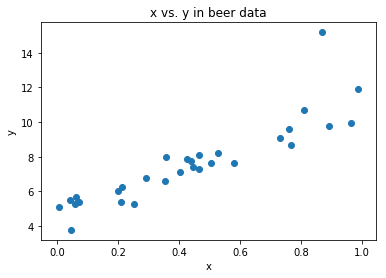

In [30]:
#### Plot the data
# your code here
plt.scatter(beer_df.x, beer_df.y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("x vs. y in beer data")

In [31]:
#### Generate the ordinary least squares model (OLS)
# your code here
ols_model = OLS(beer_df.y, sm.add_constant(beer_df.x)).fit()

Text(0.5,1,'x vs. y in beer data with regression')

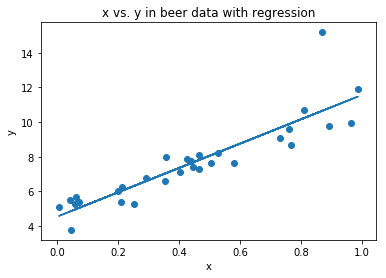

In [32]:
#### Plot the data along with OLS fit line
# your code here
plt.scatter(beer_df.x, beer_df.y)
plt.plot(beer_df.x, ols_model.predict(sm.add_constant(beer_df.x)))
plt.xlabel('x')
plt.ylabel('y')
plt.title("x vs. y in beer data with regression")

In [33]:
#### LET'S MAKE THE REGRESSION MODEL WITH t-Students distribution
# your code here
class StudentRegression(object):
    def __init__(self, df, sigma, X, y):
        self.params = {'df' : df,'sigma' : sigma}
        self.X = X.values.reshape(-1,1)
        self.n = self.X.shape[0]
        self.X = np.append(self.X, np.ones(self.n).reshape(self.n,1), axis = 1)
        self.y = y.values.reshape(-1,1)
    
    def get_params(self, k):
        return self.params[k]
    
    def set_params(self, **kwargs):
        for k,v in kwargs.items():
            self.params[k] = v
        
    def fit(self):           
        logpdf = lambda x: t.logpdf(x, self.params['df'], loc=0, scale=self.params['sigma'])
        neg_log_likelihood = lambda coef: -np.sum(logpdf(self.X.dot(coef).reshape(-1,1)-self.y))

        #calculate coefficients
        coef_init = np.array([7,4]).reshape(-1,1)
        coef = minimize(neg_log_likelihood, coef_init, method='Nelder-Mead')
        self.params['coef'] = coef.x

    def predict(self, X_pred):
        x = X_pred.values.reshape(-1,1)
        x = np.append(x, np.ones(x.shape[0]).reshape(-1,1), axis=1)
        return x.dot(self.params['coef'])
        
    def score(self, X, y):
        # your code
        SST = np.sum((y-np.mean(y))**2)
        SSE = np.sum((y-self.predict(X))**2)
        return 1 - SSE/SST

In [34]:
t_model = StudentRegression(5, np.sqrt(3/5), beer_df.x, beer_df.y)
t_model.fit()
t_model.params

{'df': 5, 'sigma': 0.7745966692414834, 'coef': array([6.17291817, 4.7738314 ])}

**7.2 Compare the two models performances (visualize the prediction lines and estimate the KL divergence between the data and each model) and comment why it is perhaps appropriate to use the Student's t-distribution instead of the Normal. **


*your answer here*


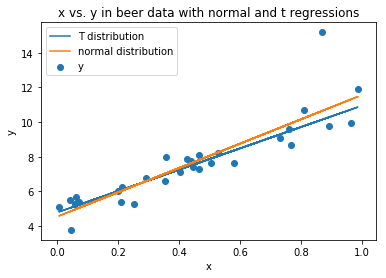

In [35]:
plt.scatter(beer_df.x, beer_df.y)
plt.plot(beer_df.x, t_model.predict(beer_df.x),label ="T distribution")
plt.plot(beer_df.x, ols_model.predict(sm.add_constant(beer_df.x)),label ="normal distribution")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title("x vs. y in beer data with normal and t regressions")
plt.show()

In [37]:
# your code here
resid_t = beer_df.y - t_model.predict(beer_df.x)
resid_norm = beer_df.y - ols_model.predict(sm.add_constant(beer_df.x))

pdf_t = lambda x : t.pdf(x, df = 5, loc = 0, scale = np.sqrt(3/5))
pdf_norm = lambda x : norm.pdf(x, scale = np.std(resid_norm))

print("KL divergence for normal distribution minus KL for t-distribution:", np.mean(np.log(pdf_t(resid_t)/pdf_norm(resid_norm))))

KL divergence for normal distribution minus KL for t-distribution: 0.23090166134812778


*your answer here*

Visually inspecting the plot above suggests that the t-distribution fits our data better. This is because the tails of t-distributions are larger so linear regressions that assume a t-distribution are less sensitive to outliers.

To formalize this, consider the KL divergences. Let $p_{data}$ be the empirical distribution estimating the data generating process, $p_{norm}$ be the normal distribution we fit in our regression, and $p_t$ be the t distribtion we also fit via regression.

$$
\text{D}(p_{data},p_{norm}) - \text{D}(p_{data},p_t) = \frac{1}{N}\sum_i\left(\frac{p_t(y_i)}{p_{norm}(y_i)}\right) > 0
$$

Hence, the KL divergence between our empirical distribution and the normal distribution is greater than the KL divergence between the empirical distribution and the t distribution. Assuming a t distribution for our data is less "surprising", meaning that it is a better fit


<div class='exercise'> <b>  Question 8: Akaike Information Criterion (AIC) </b> </div>

Perform a simple numerical experiment to understand and demonstrate the AIC by using the given `generate_data` function to generate your data.
 

**8.1**
Generate data for different number of parameters $k$, in the range 1 to 10. For each of the six models generate 1000 training and 1000 testing datasets with each one containing $n=50$ observations.

**8.2** 
Use the training set to estimate the OLS coefficients and  calculate the predicted values, $\hat y_{tr}$, on the training set and the log-likelihood. 
 Use the OLS coefficients to calculate the predicted values  for the testing set, $\hat y_{te}$, and the associated log-likelihood. 

**8.3** 
For each $k$ compute the average and standard deviation of the log-likelihoods across the 1000 simulations.  Plot the average  log-likelihoods (with error bars) and the average AIC as function of $k$, the number of parameters. What is the best $k$ based on AIC?

**8.4**
Verify the results in 8.3 by plotting the average log-likelihoods for each of the training and testing datasets as a function of $k$. What is the best $k$ based on this plot?


**Comment:**
1. The function "generate_data" uses an interesting trick to generate data directly using the regression coefficients as proxies for the correlations with the response variable. It generates data from a Normal distribution, hence $y_i \sim \mathcal{N}(\mu_i= 0.15 x_{1,i} - 0.4 x_{2,i},\sigma^2=1)$.

In [38]:
def generate_data(N,k,beta=[0.15 , -0.4]):
    
    ## N: The number of observations
    ## k: The number of parameters
    ## beta is the weights vector for the covariates x1, x2
    ##
    ## Make d_min be greater or equal to k
    n_dim = 1+len(beta)
    if (n_dim <= k):
        n_dim = k

    Rho = np.eye(n_dim)
    
    # Add beta in the first row or Rho
    for i,r in enumerate(beta):
        Rho[0,i+1] = r
    
    index_lower = np.tril_indices(n_dim, -1)
    
    Rho[index_lower] = Rho.T[index_lower]
    mean = n_dim * [0.]        
    Xtrain = np.random.multivariate_normal(mean, Rho, size=N)
    Xtest = np.random.multivariate_normal(mean, Rho, size=N)
    ytrain = Xtrain[:,0].copy()
    Xtrain[:,0]=1.
    ytest = Xtest[:,0].copy()
    Xtest[:,0]=1.
    return Xtrain[:,:k], ytrain, Xtest[:,:k], ytest

### Answers

**8.1 Generate data for different number of parameters $k$, in the range 1 to 10. For each of the ten models generate 1000 training and 1000 testing datasets with each one containing $n=50$ observations.**


In [39]:
#### Be familiar with the generated data by printing them:
# your code here
for d in generate_data(10,2):
    print(d)
    print('----------------')

[[ 1.         -0.7767165 ]
 [ 1.          0.18501063]
 [ 1.         -0.73732799]
 [ 1.         -0.25335297]
 [ 1.          1.1376084 ]
 [ 1.          0.22246277]
 [ 1.          0.34706842]
 [ 1.         -0.34763334]
 [ 1.         -0.48151691]
 [ 1.          0.16379733]]
----------------
[-1.21968    -0.10755208  0.5450195  -0.79343618 -0.02283883 -0.42269615
 -0.53257513  0.38050016  0.32485441 -2.58128748]
----------------
[[ 1.          1.0810378 ]
 [ 1.         -1.34142167]
 [ 1.          1.51782813]
 [ 1.         -0.770207  ]
 [ 1.          1.48409741]
 [ 1.          0.03071772]
 [ 1.          0.30117271]
 [ 1.         -1.20770116]
 [ 1.         -0.1563523 ]
 [ 1.          0.02415695]]
----------------
[-0.19767861 -1.90577327  1.05153771  1.60530385  1.17492306 -2.63740153
 -0.42915273  1.31277591 -0.04681281  0.62936748]
----------------


In [40]:
data_all = {}
for k in range(1,11):
    data_all[k] = [generate_data(50,k) for _ in range(1000)]

**8.2 Use the training set to estimate the OLS coefficients and  calculate the predicted values, $\hat y_{tr}$, on the training set and the associated log-likelihood. 
 Use the OLS coefficients to calculate the predicted values  for the testing set, $\hat y_{te}$, and the associated log-likelihood.**


In [41]:
def log_likelihood(y,y_pred):
    resid = y-y_pred
    return np.sum(norm.logpdf(resid))

In [42]:
# your code here
outputs = {}
for k in data_all:
    
    # initialize output
    outputs[k] = {}
    outputs[k]['y_train_pred'] = []
    outputs[k]['y_train_log_likelihood'] = []
    outputs[k]['y_test_pred'] = []
    outputs[k]['y_test_log_likelihood'] = []
    outputs[k]['aic'] = []   
    
    for data in data_all[k]:
        # fit model
        model = OLS(data[1],data[0]).fit()
        
        #record aic
        outputs[k]['aic'].append(model.aic)
        
        # make predictions on train set
        y_train_pred = model.predict(data[0])
        outputs[k]['y_train_pred'].append(y_train_pred)
        outputs[k]['y_train_log_likelihood'].append(log_likelihood(data[1],y_train_pred))
        
        # make predictions on test set
        y_test_pred = model.predict(data[2])
        outputs[k]['y_test_pred'].append(y_test_pred)
        outputs[k]['y_test_log_likelihood'].append(log_likelihood(data[3],y_test_pred))      

**8.3
For each $k$ compute the average and standard deviation of the log-likelihoods across the 2000 simulations.  Plot the average  log-likelihoods (with error bars) and the average AIC as function of $k$, the number of parameters. What is the best $k$ based on AIC?**

In [43]:
# your code here
average_likelihoods_train = [np.mean(outputs[k]['y_train_log_likelihood']) for k in outputs]
std_likelihoods_train = [np.std(outputs[k]['y_train_log_likelihood']) for k in outputs]
average_likelihoods_test = [np.mean(outputs[k]['y_test_log_likelihood']) for k in outputs]
std_likelihoods_test = [np.std(outputs[k]['y_test_log_likelihood']) for k in outputs]
average_aic_train = [np.mean(outputs[k]['aic']) for k in outputs]

Text(0.5,1,'AIC vs. Model Complexity')

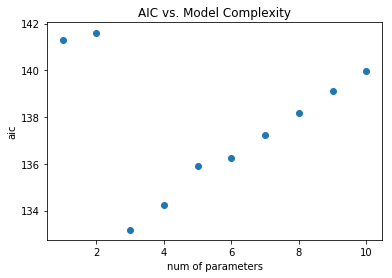

In [46]:
plt.scatter(data_all.keys(), average_aic_train)
plt.xlabel('num of parameters')
plt.ylabel('aic')
plt.title('AIC vs. Model Complexity')


The best k based on aic is 3


**8.4
Verify the results in 8.3 by plotting the average log-likelihoods for each of the training and testing datasets as a function of $k$. What is the best $k$ based on this plot?
**


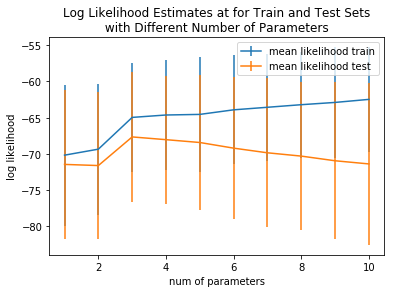

In [45]:
#### Plot the log-likelihood for the traing and testing:
# your code here
#plt.scatter(data_all.keys(),average_aic,label='mean aic')
plt.errorbar(data_all.keys(), average_likelihoods_train, 
             yerr=np.array(std_likelihoods_train)*1.96, 
             label = 'mean likelihood train')
plt.errorbar(data_all.keys(), average_likelihoods_test, 
             yerr=np.array(std_likelihoods_test)*1.96, 
             label = 'mean likelihood test')

plt.xlabel('num of parameters')
plt.ylabel('log likelihood')
plt.title('Log Likelihood Estimates at for Train and Test Sets\n with Different Number of Parameters ')
plt.legend()
plt.show()

The best validation likelihood is for k=3, which confirms the result provided by analyzing the AIC.